In [3]:
import numpy as np
import pandas as pd
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

dataset_train = pd.read_csv("SP500_train.csv")
dataset_test = pd.read_csv("SP500_test.csv")

trainingset = dataset_train.iloc[:,5:6].values
testset = dataset_test.iloc[:,5:6].values

minmax = MinMaxScaler()
scaled_train_data = minmax.fit_transform(trainingset)


X_train = []
Y_train = []
for i in range(40,trainingset.shape[0]):
    X_train.append(scaled_train_data[i - 40 :i,0])
    Y_train.append(scaled_train_data[i,0])
    
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

#num_of_samples,num_of_features,1
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

# build the lstm model
model=Sequential()
model.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50,))
model.add(Dropout(0.3))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,Y_train,epochs=100,batch_size=32)

dataset_total = pd.concat((dataset_train["adj_close"],dataset_test["adj_close"]),axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-40:].values

inputs=inputs.reshape(-1,1)
scaled_test_data = minmax.fit_transform(inputs)
X_test = []


Epoch 1/100
1218/1218 [==============================] - 9s 7ms/step - loss: 0.0496
Epoch 2/100
1218/1218 [==============================] - 5s 4ms/step - loss: 0.0095
Epoch 3/100
1218/1218 [==============================] - 6s 5ms/step - loss: 0.0082
Epoch 4/100
1218/1218 [==============================] - 6s 5ms/step - loss: 0.0077
Epoch 5/100
1218/1218 [==============================] - 6s 5ms/step - loss: 0.0070
Epoch 6/100
1218/1218 [==============================] - 7s 6ms/step - loss: 0.0077
Epoch 7/100
1218/1218 [==============================] - 6s 5ms/step - loss: 0.0074
Epoch 8/100
1218/1218 [==============================] - 6s 5ms/step - loss: 0.0058
Epoch 9/100
1218/1218 [==============================] - 7s 6ms/step - loss: 0.0059
Epoch 10/100
1218/1218 [==============================] - 6s 5ms/step - loss: 0.0055
Epoch 11/100
1218/1218 [==============================] - 8s 6ms/step - loss: 0.0055
Epoch 12/100
1218/1218 [==============================] - 6s 5ms/step - lo

1218/1218 [==============================] - 6s 5ms/step - loss: 0.0020
Epoch 98/100
1218/1218 [==============================] - 6s 5ms/step - loss: 0.0019
Epoch 99/100
1218/1218 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 100/100
1218/1218 [==============================] - 6s 5ms/step - loss: 0.0018


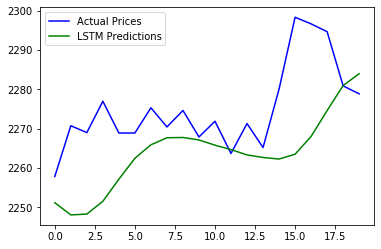

In [4]:
for i in range(40,len(testset)+40):
    X_test.append(scaled_test_data[i - 40 :i,0])
    
X_test=np.asarray(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))



predictions=model.predict(X_test)
predictions=minmax.inverse_transform(predictions)
plt.plot(testset,color='b',label='Actual Prices')
plt.plot(predictions,color='green',label='LSTM Predictions')
plt.legend()
plt.show()